In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2] 

In [4]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [5]:
Y = iris.target

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [8]:
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [9]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [10]:
h=.02

In [11]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
Z = Z.reshape(xx.shape)

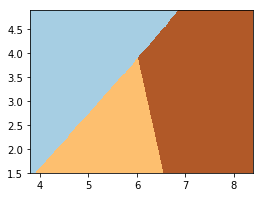

In [13]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

In [14]:
import numpy as np
import pandas as pd
import csv
from pandas import *
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
def load_file_train():
    train_df = pd.read_csv("train.csv")
    cols = ["Pclass","Sex","Age"]
    #change male to 1 and female to 0
    train_df["Sex"] = train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
    train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
    survived = train_df["Survived"].values
    data = train_df[cols].values
    return survived,data

In [16]:
def load_file_test():
    train_df = pd.read_csv("test.csv")
    cols = ["Pclass","Sex","Age"]
    #change male to 1 and female to 0
    train_df["Sex"] = train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
    train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
    data = train_df[cols].values
    passId = train_df["PassengerId"].values
    return data,passId

In [21]:
def learn_model(survived,data_train,data_test,passId):
    model = LogisticRegression()
    model.fit(data_train,survived)
    predicted = model.predict(data_test)
    #evaluate_model(predicted,target_test)
    output = pd.DataFrame(columns=['PassengerId', 'Survived'])
    output['PassengerId'] = passId
    output['Survived'] = predicted.astype(int)
    output.to_csv('logisticRegressionSubmit.csv', index=False)

In [22]:
def main():
    survived, data_train = load_file_train()
    data_test,passId = load_file_test()
    learn_model(survived,data_train,data_test,passId)

In [23]:
# main function
main()